# Causal Discovery using a Perfect Oracle

A perfect oracle is a conditional independence (CI) test that always yields the true answer.
For that, the oracle requires access to the true underlying graph from which it can read-off the true conditional independence relation.
Although this is impractical, access to the true graph is granted in a simulated environment for evaluating the number of CI tests required by an algorithm in the large sample limit.

For demonstrating how to use a perfect oracle we follow these steps:

1. Create a true underlying DAG
2. Learn a PAG using ICD and a perfect oracle
3. Plot the results

Let's start by importing the required classes and methods.


In [22]:
import sys
sys.path.append('..')

from causal_discovery_algs import LearnStructICD  # import ICD algorithm
from causal_discovery_utils.cond_indep_tests import DSep  # import the perfect oracle
from graphical_models import DAG  # import a DAG class
from plot_utils import draw_graph  # for plotting the graphs

Next, let's create the true underlying DAG, a graph with 7 nodes, and define which nodes are observed.

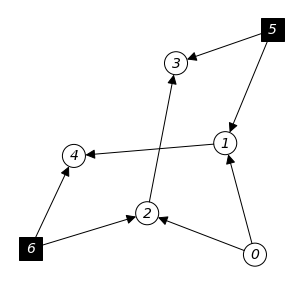

In [23]:
nodes_of_dag = set(range(7))
dag = DAG(nodes_of_dag)
dag.add_edges(parents_set={5, 0}, target_node=1)
dag.add_edges(parents_set={6, 0}, target_node=2)
dag.add_edges(parents_set={5, 2}, target_node=3)
dag.add_edges(parents_set={6, 1}, target_node=4)
observed_set = {0, 1, 2, 3, 4}  # latents set is {5, 6}
fig_dag = draw_graph(dag, latent_nodes=nodes_of_dag - observed_set)  # plot the DAG

Now, instantiate a perfect oracle, set it to count the performed CI tests, and turn on caching.

In [24]:
ci_test_dsep = DSep(true_dag=dag,  # the DAG from which to read-off the true conditional independence relations
                    count_tests=True,  # count CI tests per conditioning set size
                    use_cache=True)  # make sure the same CI test is not performed and counted more than once

Then, learn the casual structure using the perfect oracle.

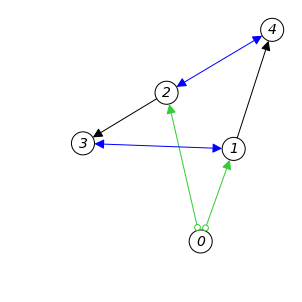

In [25]:
icd = LearnStructICD(nodes_set=observed_set, ci_test=ci_test_dsep)  # instantiate ICD
icd.learn_structure()  # learn the structure
fig_pag = draw_graph(icd.graph)  # plot the PAG

Finally, let's plot the number of CI tests per conditioning set size.

In [26]:
num_ci_tests = ci_test_dsep.test_counter
str_cs_size = 'Condition set size: '
str_num_cit = 'Number of CI tests: '
max_str_len = len(str(max(num_ci_tests))) + 3
for cs_size, num_cit in enumerate(num_ci_tests):
    str_cs_size += str(cs_size).ljust(max_str_len)
    str_num_cit += str(num_cit).ljust(max_str_len)
print('Number of estimated CI tests')
print('----------------------------')
print(str_cs_size)
print(str_num_cit)
print('Total number of CI tests: ', sum(num_ci_tests))


Number of estimated CI tests
----------------------------
Condition set size: 0    1    2    3    4    5    
Number of CI tests: 10   24   3    1    0    0    
Total number of CI tests:  38
